# Transfer learning with Resnet 50

In [6]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [7]:
from fastai import *
from fastai.vision import *
bs =64

In [8]:
## Declaring path of dataset
path_img = Path('/media/shwetkm/Data/DS/kreate/MAll91/data/copy')

## Loading data and Normalizing data based on Image net parameters
ds_tfms = get_transforms()
data = (ImageList.from_folder(path_img)
        .split_by_rand_pct(0.3)
        .label_from_folder()
        .transform(tfms=ds_tfms, size=224)
        .databunch(bs=bs)).normalize(imagenet_stats)

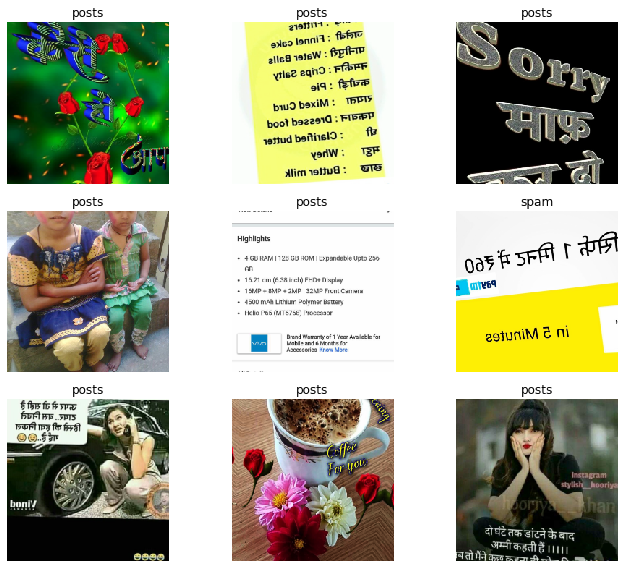

In [9]:
data.show_batch(rows=3, figsize=(10,8))

In [10]:
print(data.classes)
len(data.classes),data.c

['posts', 'spam']


(2, 2)

In [6]:
## To create a ResNET 50 with pretrained weights
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [7]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.227152,0.544437,0.178363,02:36
1,0.984183,0.671462,0.219298,05:04
2,0.772416,0.389617,0.149123,05:22
3,0.620986,0.226596,0.070175,04:11
4,0.510178,0.217248,0.058480,02:51


In [8]:
learn.save('spam_stage1')

In [10]:
interp = ClassificationInterpretation.from_learner(learn)

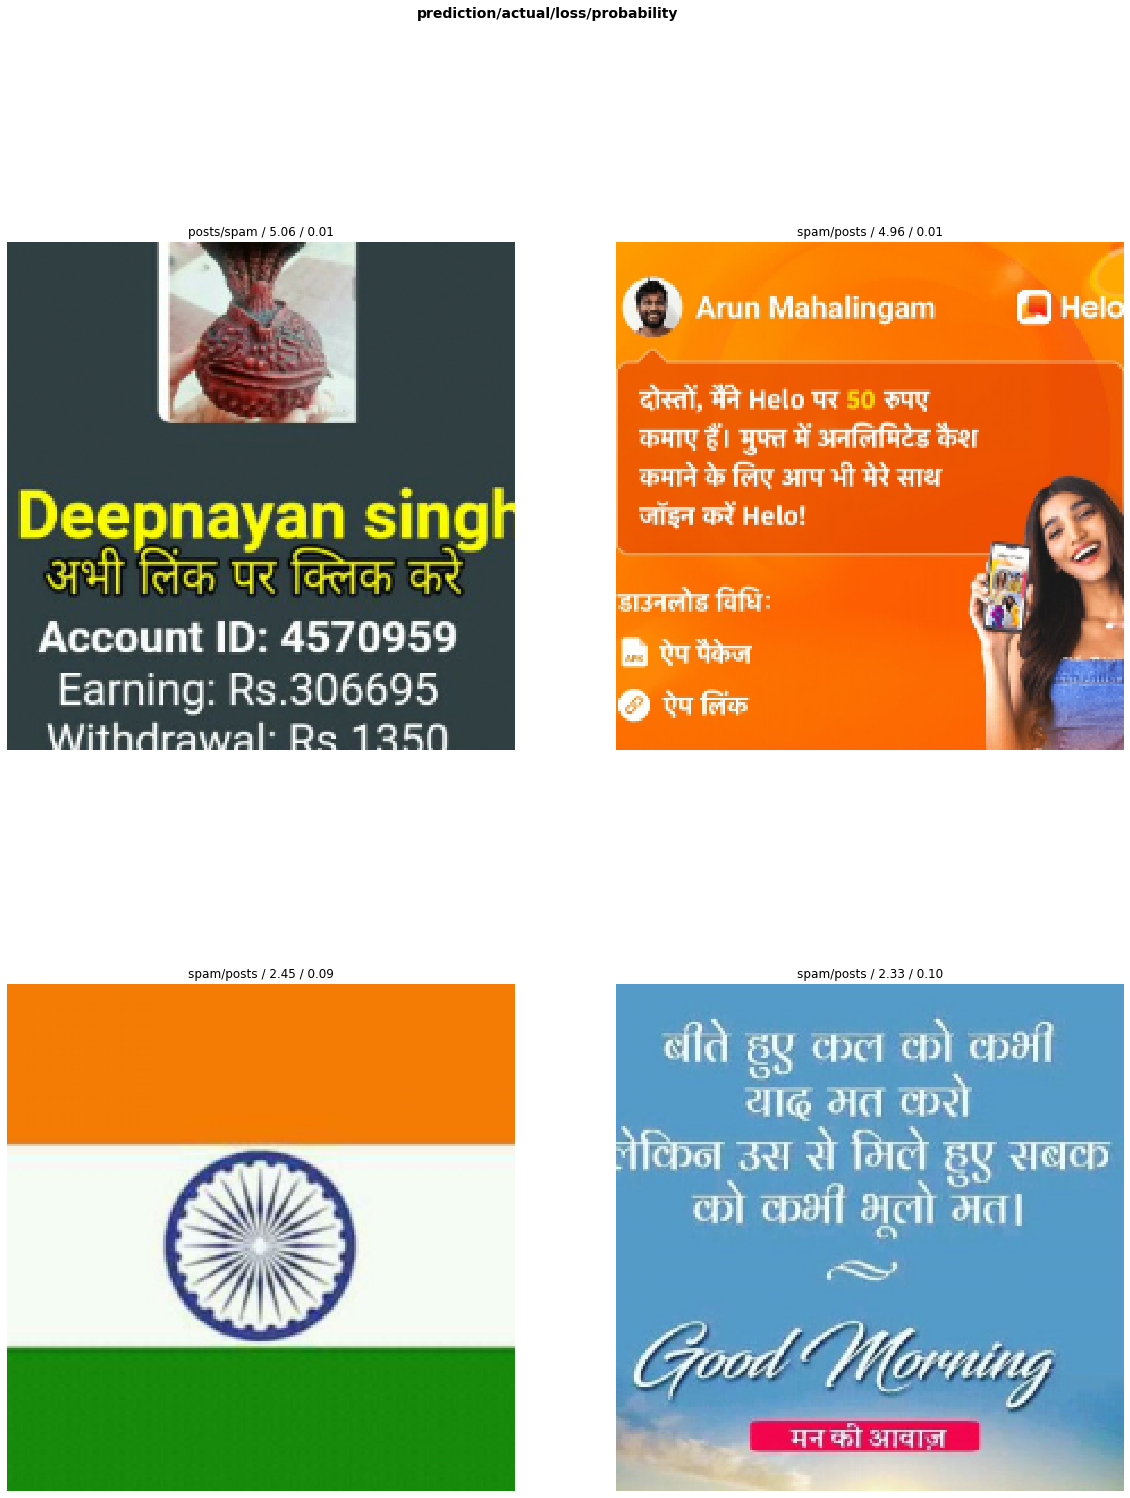

In [11]:
interp.plot_top_losses(4, figsize=(20,25))

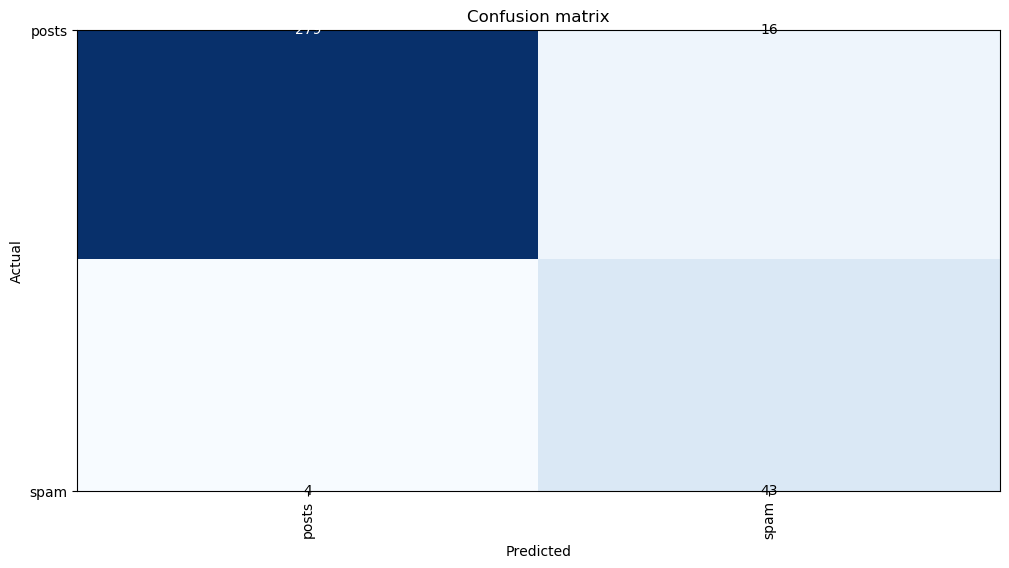

In [12]:
interp.plot_confusion_matrix(figsize=(10,10), dpi=100)

In [13]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


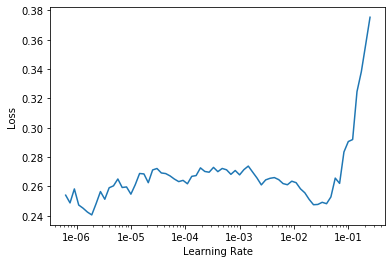

In [14]:
learn.recorder.plot()

In [15]:
learn.load('spam_stage1')

Learner(data=ImageDataBunch;

Train: LabelList (799 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
posts,posts,posts,posts,posts
Path: /media/shwetkm/Data/DS/kreate/MAll91/data/copy;

Valid: LabelList (342 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
posts,posts,posts,posts,posts
Path: /media/shwetkm/Data/DS/kreate/MAll91/data/copy;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-2))

In [20]:
learn.save('spam_stage2')